# Disease Diagnosis Using Machine Learning (ML)
The project is inteneded to apply multiple supervised classfication Machine Learning algorithms to a health care data set to check the ability of the ML models to diagnose the disease accurately.

## Data Loading and Data Exploration 
We are going to start by loading the dataset from the file into the pandas dataframe. Note: The additional new modules  will be imported as required during the code implementation of the project

In [1]:
import pandas
data_file = "diabetes.csv" # the data file location
df = pandas.read_csv(data_file) # reading the data from the data file as pandas dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, we will explore the dataset by finding the column names, number of instances for each class values and computing other statistical description of each column

In [2]:
print("\nThe instances present in the data set are")
print(df.shape,'\n')
print ("And, the columns in the dataset are:\n", (df.columns),'\n')

print("The datatype of each column of the dataset is as below: \n")
print(df.info())


The instances present in the data set are
(768, 9) 

And, the columns in the dataset are:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

The datatype of each column of the dataset is as below: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   76

The dataset has 8 attribute columns and the class varaible that indicates where the diagnosis of diabetes
is positive or negative is Outcome variable. Outcome 1 means positively diagnosed with diabetes and 0 means negatively diagonsed.

In [17]:
print("The distribution of diabetes dataset based on Outcome class is:\n" )
print(df.groupby('Outcome').size())
print(" ")


The distribution of diabetes dataset based on Outcome class is:

Outcome
0    500
1    268
dtype: int64
 


In [3]:
print("The statistical description of each of the attribue of the given diabetes dateset is as below:")
df.drop('Outcome',axis=1).describe(include='all')

The statistical description of each of the attribue of the given diabetes dateset is as below:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Exploratory Visualization
Here, we plot histograms and box plots of attributes to check the constancy of any variable. If any variable is constant through out that can be dropped while traing ML models to diagnose the diabetes.

 HISTORGRAMS 


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


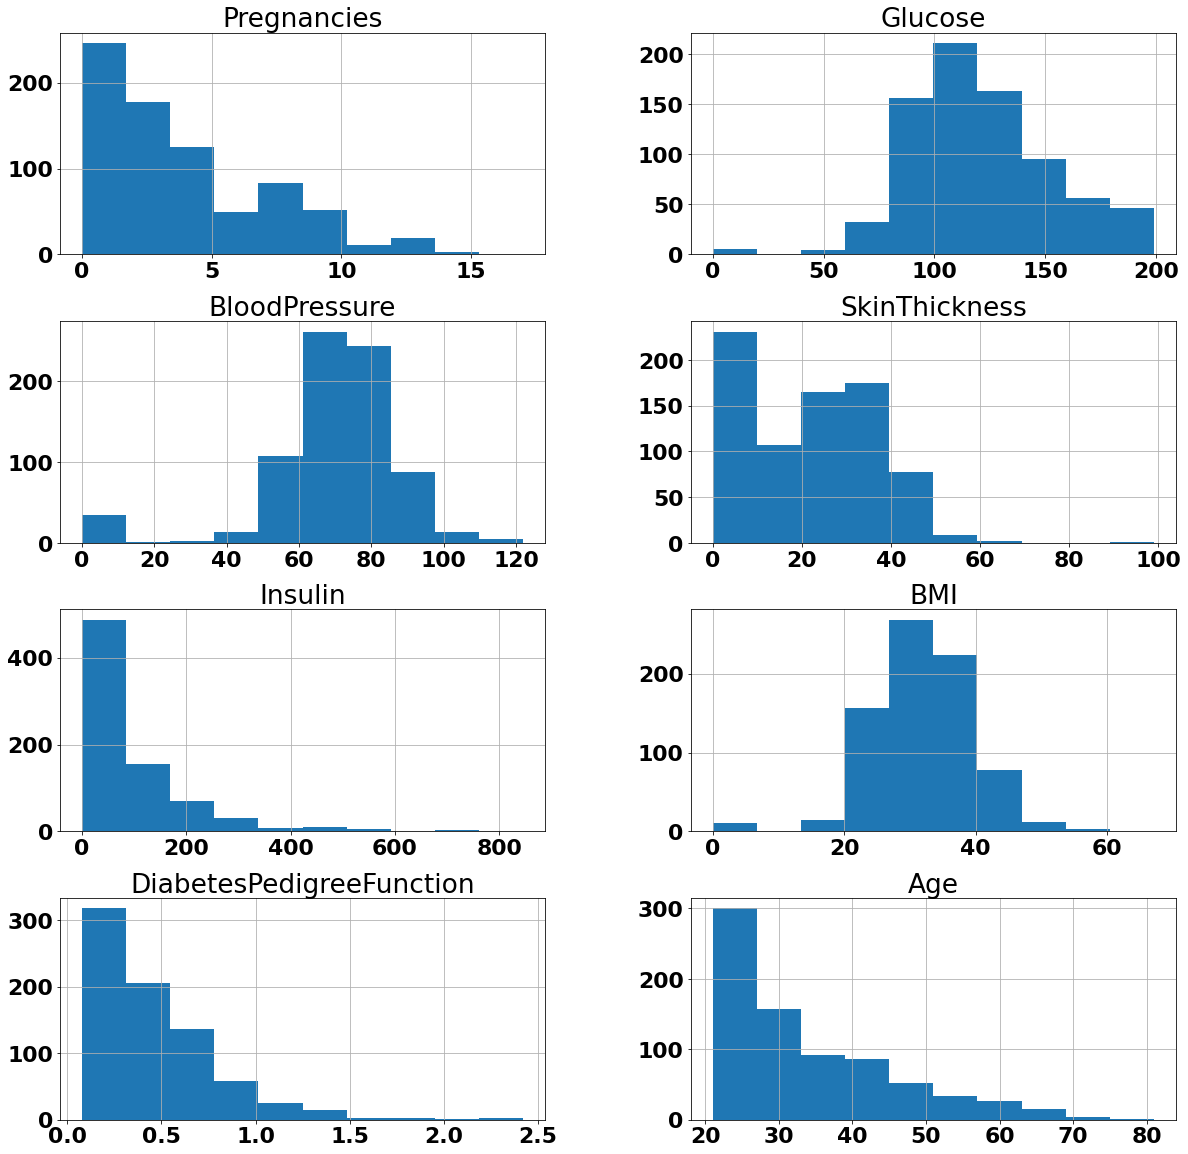

<Figure size 144x144 with 0 Axes>

In [4]:
# importing module to plot and describing the font size for the plots
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

print(' HISTORGRAMS ')
#Dropping the column with Outcome and drawing historgram for each attribute
temp_df = df.drop('Outcome',axis=1)
temp_df.hist(figsize=(20,20), layout=(4,2))
plt.figure(figsize=(2, 2))
plt.show()

Here, no attribue is constant through out due to which we are not going to drop any of the attributes for the further analysis.

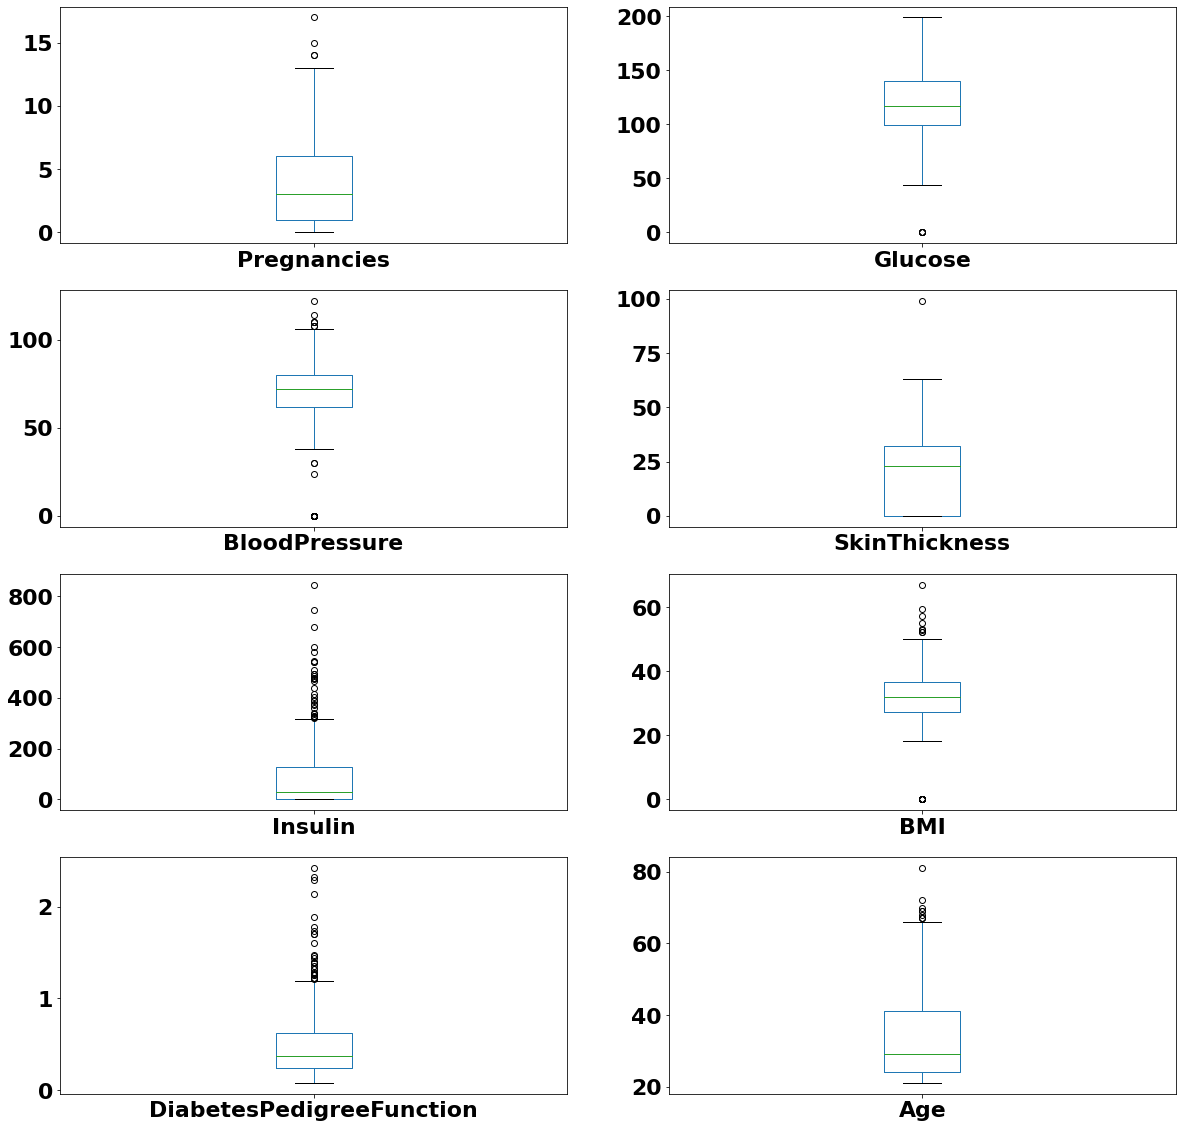

In [5]:
#drawing box plot for each attribute
temp_df.plot(kind='box', subplots=True, layout=(4,2),\
sharex=False, sharey=False,figsize=(20,20))
plt.show()

In [6]:
print('Plotted histogram and box plot helped in exploring about range of\
\nvalues for each attribute of the given data set.')

Plotted histogram and box plot helped in exploring about range of
values for each attribute of the given data set.


## Model Trainin and Evaluation
Now we will train different classification ML algorithms and evaluate their performance to diagnose the diabetes
based on the given attributes in the dataset. We will be using some classification ML algorithms from scikit-learn library in the beginning and then we will use the ML algorithms from the AutoGluon Library

Lets start by splitting the dataset into train and test dataset.

In [7]:
from sklearn import model_selection

print('Hence, we have splitted the data into 70 percent as a\
\ntraining data set and the rest as test data. We used name validation for the test dataset')
array = df.values
X = array[:,0:7]
Y = array[:,8]
seed = 40
X_train,X_validation,Y_train,Y_validation= \
model_selection.train_test_split(X,Y,test_size=0.70,random_state=seed)

Hence, we have splitted the data into 70 percent as a
training data set and the rest as test data. We used name validation for the test dataset


## Random Forest Classifier

In [8]:
#Random Forest Classifier
print('RANDOM FOREST CLASSIFER RESULTS:')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
num_trees = 100
max_features = 7
model_rf= RandomForestClassifier(n_estimators=num_trees,\
max_features=max_features)
model_rf=model_rf.fit(X_train,Y_train)
predictions_rf = model_rf.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,\
predictions_rf))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_rf))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_rf))


RANDOM FOREST CLASSIFER RESULTS:
Accuracy score: 0.7360594795539034
Confusion matrix:
 [[301  46]
 [ 96  95]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       347
         1.0       0.67      0.50      0.57       191

    accuracy                           0.74       538
   macro avg       0.72      0.68      0.69       538
weighted avg       0.73      0.74      0.73       538



## Decision Tree Classifier

In [9]:
#Using Decision Tree classifier
print('Decision tree classifier results: ')
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()
model_dt=model_dt.fit(X_train,Y_train)
predictions_dt = model_dt.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_dt))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_dt))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_dt))

Decision tree classifier results: 
Accuracy score: 0.6338289962825279
Confusion matrix:
 [[258  89]
 [108  83]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       347
         1.0       0.48      0.43      0.46       191

    accuracy                           0.63       538
   macro avg       0.59      0.59      0.59       538
weighted avg       0.63      0.63      0.63       538



## Naive Bayes Classifier

In [10]:
# Using Naïve Bayes classifier
print('Naïve Bayes classifier Results:')
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb=model_nb.fit(X_train,Y_train)
predictions_nb = model_nb.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_nb))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_nb))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_nb))

Naïve Bayes classifier Results:
Accuracy score: 0.7676579925650557
Confusion matrix:
 [[304  43]
 [ 82 109]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       347
         1.0       0.72      0.57      0.64       191

    accuracy                           0.77       538
   macro avg       0.75      0.72      0.73       538
weighted avg       0.76      0.77      0.76       538



## Perceptron

In [11]:
#Using Perceptron
print('Perceptron results: ')
from sklearn.linear_model import Perceptron
model_pn=Perceptron( eta0=0.01, shuffle=True)
model_pn=model_pn.fit(X_train,Y_train)
predictions_pn = model_pn.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_pn))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_pn))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_pn))

Perceptron results: 
Accuracy score: 0.5111524163568774
Confusion matrix:
 [[182 165]
 [ 98  93]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.65      0.52      0.58       347
         1.0       0.36      0.49      0.41       191

    accuracy                           0.51       538
   macro avg       0.51      0.51      0.50       538
weighted avg       0.55      0.51      0.52       538



## Multilayer Perceptron

In [12]:
# Using Multilayer Perceptron
print('Multilayer Perceptron Results: ')
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
ss = StandardScaler()
ss.fit(X_train)
X_train1 = ss.transform(X_train)
X_validation1 = ss.transform(X_validation)
model_mlp=MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(13,13),max_iter=500)
model_mlp=model_mlp.fit(X_train1,Y_train)
predictions_mlp = model_mlp.predict(X_validation1)
print('Accuracy score:',accuracy_score(Y_validation,predictions_mlp))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_mlp))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_mlp))


Multilayer Perceptron Results: 
Accuracy score: 0.6784386617100372
Confusion matrix:
 [[269  78]
 [ 95  96]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       347
         1.0       0.55      0.50      0.53       191

    accuracy                           0.68       538
   macro avg       0.65      0.64      0.64       538
weighted avg       0.67      0.68      0.67       538



## VotingClassifier

In [13]:
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = MLPClassifier()
estimators.append(('mlp', model3))
model4=GaussianNB()
estimators.append(('nb',model4))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
model_ensemble=ensemble.fit(X_train,Y_train)
predictions_en = model_ensemble.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_en))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_en))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_en))

Accuracy score: 0.7211895910780669
Confusion matrix:
 [[278  69]
 [ 81 110]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       347
         1.0       0.61      0.58      0.59       191

    accuracy                           0.72       538
   macro avg       0.69      0.69      0.69       538
weighted avg       0.72      0.72      0.72       538



## Diagonising Disease using ML in AutoGluon's Tabular Prediction
Now, we will perfrom AutoGluons's Tabular Prediction to train multiple ML classifiction algorithms with diabetest dataset.
Let's download the required modules first.

In [14]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 952 kB 26.7 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.6.0.post20210108
    Uninstalling setuptools-49.6.0.post20210108:
      Successfully uninstalled setuptools-49.6.0.post20210108
     |████████████████████████████████| 47.3 MB 21.5 MB/s            
     |████████████████████████████████| 8.6 MB 67.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=f1cad2c1bd81a1290ced02a5652f3229f5083fb1e699072ca0de2b66bc965816
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e3/99/1c/1773fc73b6df1708ded8d1c713726edc8c93714115ef849fd8
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2

In [16]:
# importing the TabularPrdictor.
from autogluon.tabular import TabularPredictor

In [19]:
import numpy as np
# splitting the dataset into train and test
train,test =  np.split(df.sample(frac=1, random_state=42), 
                       [int(.7*len(df))])

In [21]:
print("The distribution of train dataset based on Outcome class is:\n" )
print(train.groupby('Outcome').size())
print(" ")

The distribution of train dataset based on Outcome class is:

Outcome
0    348
1    189
dtype: int64
 


## Step 3: Train a model using AutoGluon’s Tabular Prediction
Requirements:
* We are prediting `Outcome`, so it is the label we are setting.
* Use the `accuracy` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best mo

In [22]:
predictor = TabularPredictor(label='Outcome',eval_metric='accuracy').fit(train_data=train,time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220114_064333/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220114_064333/"
AutoGluon Version:  0.3.1
Train Data Rows:    537
Train Data Columns: 8
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3262.31 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature 

# Review AutoGluon's training run with ranking of models that did the best.


In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.802607       2.698806  175.566044                0.001508           1.881861            2       True         14
1           LightGBM_BAG_L1   0.793296       0.291143   20.493546                0.291143          20.493546            1       True          4
2      LightGBMLarge_BAG_L1   0.789572       0.453669   54.407889                0.453669          54.407889            1       True         13
3    NeuralNetFastAI_BAG_L1   0.789572       1.756501   71.808233                1.756501          71.808233            1       True         10
4           CatBoost_BAG_L1   0.778399       0.195985   26.974516                0.195985          26.974516            1       True          7
5     ExtraTreesGini_BAG_L1   0.776536       0.124639    0.642416         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7225325884543762,
  'KNeighborsDist_BAG_L1': 0.7188081936685289,
  'LightGBMXT_BAG_L1': 0.776536312849162,
  'LightGBM_BAG_L1': 0.7932960893854749,
  'RandomF

<AxesSubplot:xlabel='model'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


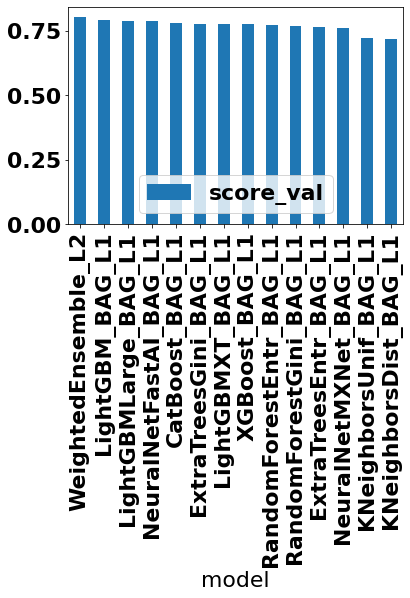

In [24]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [28]:
# Evaluation
predictions = predictor.predict(test)
print('Accuracy score:',accuracy_score(test['Outcome'].values,predictions))
print('Confusion matrix:\n',confusion_matrix(test['Outcome'].values,predictions))
print('\nClassification Report: \n',classification_report(test['Outcome'].values,predictions))

Accuracy score: 0.7402597402597403
Confusion matrix:
 [[133  19]
 [ 41  38]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       152
           1       0.67      0.48      0.56        79

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



## Training with Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [29]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 10*60  # train various models for ~2 min
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='Outcome',eval_metric='accuracy').fit(
    train_data=train, time_limit=time_limit,presets='best_quality',
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20220114_065516/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220114_065516/"
AutoGluon Version:  0.3.1
Train Data Rows:    537
Train Data Columns: 8
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3048.83 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set featu

In [32]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L1/T10   0.793296       0.047302   2.914901                0.047302           2.914901            1       True         11
1        LightGBM_BAG_L1/T40   0.793296       0.083991   2.856898                0.083991           2.856898            1       True         41
2         LightGBM_BAG_L1/T0   0.793296       0.102673   3.144835                0.102673           3.144835            1       True          1
3        WeightedEnsemble_L2   0.793296       0.104172   3.684409                0.001499           0.539574            2       True         88
4        LightGBM_BAG_L1/T77   0.791434       0.014151   0.922911                0.014151           0.922911            1       True         78
5        LightGBM_BAG_L1/T67   0.791434       0.014343   0.904844         

{'model_types': {'LightGBM_BAG_L1/T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T12': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T13': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T14': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T15': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T16': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T17': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T18': 'StackerEnsemble

In [30]:
#  Evaluation
prediction_new_hpo = predictor_new_hpo.predict(test)

print('Accuracy score:',accuracy_score(test['Outcome'].values,prediction_new_hpo))
print('Confusion matrix:\n',confusion_matrix(test['Outcome'].values,prediction_new_hpo))
print('\nClassification Report: \n',classification_report(test['Outcome'].values,prediction_new_hpo))

Accuracy score: 0.7186147186147186
Confusion matrix:
 [[129  23]
 [ 42  37]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       152
           1       0.62      0.47      0.53        79

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



## ML training with eval metric = f1
Lets train the AutoGluon ML with evaluation metric f1 as the train set is imbalanced for the Outcome class and
and the accuracy may be misleading when the datasets are imbalanced.

In [34]:
predictor = TabularPredictor(label='Outcome',eval_metric='f1').fit(train_data=train,time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220114_070850/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220114_070850/"
AutoGluon Version:  0.3.1
Train Data Rows:    537
Train Data Columns: 8
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2882.35 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set featu

[07:09:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6758	 = Validation score   (f1)
	2.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 579.77s of the 579.77s of remaining time.
	0.5855	 = Validation score   (f1)
	7.55s	 = Training   runtime
	0.74s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 571.44s of the 571.44s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback vi

[07:09:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6501	 = Validation score   (f1)
	5.26s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 549.35s of the 549.35s of remaining time.
	0.5885	 = Validation score   (f1)
	17.28s	 = Training   runtime
	1.47s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 538.85s of the 538.85s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback v

[07:10:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6462	 = Validation score   (f1)
	7.39s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 515.94s of the 515.94s of remaining time.
	0.6218	 = Validation score   (f1)
	27.73s	 = Training   runtime
	2.2s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 504.73s of the 504.72s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback vi

[07:10:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:10:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6409	 = Validation score   (f1)
	10.19s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 481.54s of the 481.54s of remaining time.
	0.6006	 = Validation score   (f1)
	36.71s	 = Training   runtime
	2.95s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 471.76s of the 471.76s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback v

[07:11:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:11:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:11:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:11:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6482	 = Validation score   (f1)
	15.82s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 441.07s of the 441.07s of remaining time.
	0.6066	 = Validation score   (f1)
	72.65s	 = Training   runtime
	4.99s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 402.89s of the 402.89s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[07:14:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6648	 = Validation score   (f1)
	46.7s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 247.34s of the 247.34s of remaining time.
	0.5791	 = Validation score   (f1)
	101.36s	 = Training   runtime
	6.27s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 217.25s of the 217.25s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[07:15:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:15:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:15:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:15:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6575	 = Validation score   (f1)
	49.26s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 195.85s of the 195.85s of remaining time.
	0.5791	 = Validation score   (f1)
	110.78s	 = Training   runtime
	7.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 185.66s of the 185.66s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback

[07:17:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:17:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:17:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:17:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

	0.6556	 = Validation score   (f1)
	79.28s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 78.94s of the 78.94s of remaining time.
	0.5893	 = Validation score   (f1)
	133.2s	 = Training   runtime
	9.14s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 54.21s of the 54.21s of remaining time.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 

In [35]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.712329       1.795759  207.161918                0.019053           5.680517            2       True         14
1    NeuralNetFastAI_BAG_L1   0.691293       1.014626   46.571180                1.014626          46.571180            1       True         10
2           LightGBM_BAG_L1   0.677871       0.263802   74.987325                0.263802          74.987325            1       True          4
3           CatBoost_BAG_L1   0.666667       0.157141   28.015697                0.157141          28.015697            1       True          7
4      LightGBMLarge_BAG_L1   0.664804       0.363584  130.782917                0.363584         130.782917            1       True         13
5         LightGBMXT_BAG_L1   0.664773       0.303729   74.773378         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.5917808219178083,
  'KNeighborsDist_BAG_L1': 0.5863013698630137,
  'LightGBMXT_BAG_L1': 0.6647727272727274,
  'LightGBM_BAG_L1': 0.6778711484593838,
  'Random

<AxesSubplot:xlabel='model'>

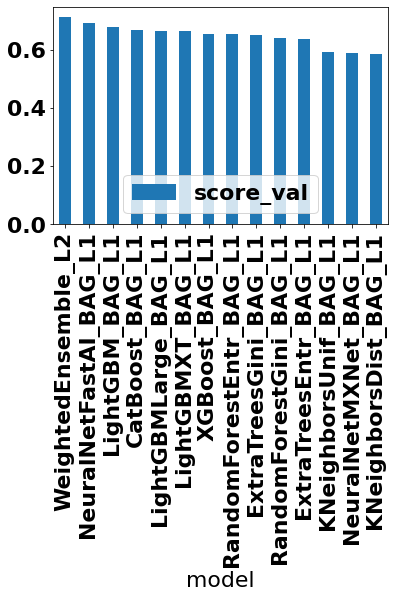

In [36]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [37]:
# Making prediction
predictions = predictor.predict(test)
## Evaluation
print('Accuracy score:',accuracy_score(test['Outcome'].values,predictions))
print('Confusion matrix:\n',confusion_matrix(test['Outcome'].values,predictions))
print('\nClassification Report: \n',classification_report(test['Outcome'].values,predictions))

Accuracy score: 0.7359307359307359
Confusion matrix:
 [[129  23]
 [ 38  41]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       152
           1       0.64      0.52      0.57        79

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231

